In [1]:
import numpy as np
import xarray as xr
import xmitgcm.llcreader as llcreader
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#3D plot
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10,10)

In [2]:
from xmitgcm import open_mdsdataset
#data_dir = './../../../Downloads/jewel-data/global_oce_latlon'
data_dir = './../../../Downloads/jewel-data/global_oce_llc90'
#ds = open_mdsdataset(data_dir)
ds = open_mdsdataset(data_dir, iters=8, geometry='llc')
ds

<xarray.Dataset> Size: 223MB
Dimensions:   (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
               k_p1: 51, face: 13, time: 1)
Coordinates: (12/41)
  * i         (i) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g       (i_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j         (j) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g       (j_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k         (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u       (k_u) int64 400B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
    ...        ...
    hFacW     (k, face, j, i_g) >f4 21MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    hFacS     (k, face, j_g, i) >f4 21MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskC     (k, face, j, i) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskW     (k, face, j, i_g) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskS     (k, face, j_g, i) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    rhoRef    (k) >f4 200B 1.024e+03 1.024e+03 1.024e+03 ... 1.052e+03 1.054e+03
Data variables: (12/33)
    T         (time, k, face, j, i) >f4 21MB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    V         (time, k, face, j_g, i) >f4 21MB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    PH        (time, k, face, j, i) >f4 21MB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    S         (time, k, face, j, i) >f4 21MB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    PHL       (time, face, j, i) >f4 421kB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    Eta       (time, face, j, i) >f4 421kB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    ...        ...
    ADVxSNOW  (time, face, j, i_g) >f4 421kB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    ADVySNOW  (time, face, j_g, i) >f4 421kB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    DFxESNOW  (time, face, j, i_g) >f4 421kB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    DFyESNOW  (time, face, j_g, i) >f4 421kB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    SIuice    (time, face, j, i_g) >f4 421kB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    SIvice    (time, face, j_g, i) >f4 421kB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(data_dir='./../../../Do...

In [21]:
#ds_sst = ds.get_dataset(varnames=['Theta'], type='latlon')
ds_sst = ds.T

In [24]:
ds

<xarray.Dataset> Size: 223MB
Dimensions:   (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
               k_p1: 51, face: 13, time: 1)
Coordinates: (12/41)
  * i         (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g       (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j         (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g       (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k         (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u       (k_u) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
    ...        ...
    hFacW     (k, face, j, i_g) >f4 21MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    hFacS     (k, face, j_g, i) >f4 21MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskC     (k, face, j, i) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskW     (k, face, j, i_g) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    maskS     (k, face, j_g, i) bool 5MB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    rhoRef    (k) >f4 200B 1.024e+03 1.024e+03 1.024e+03 ... 1.052e+03 1.054e+03
Data variables: (12/33)
    U         (time, k, face, j, i_g) >f4 21MB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    W         (time, k_l, face, j, i) >f4 21MB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    PH        (time, k, face, j, i) >f4 21MB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    ETAN      (time, face, j, i) >f4 421kB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    SIarea    (time, face, j, i) >f4 421kB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    SIheff    (time, face, j, i) >f4 421kB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    ...        ...
    SIvice    (time, face, j_g, i) >f4 421kB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    S         (time, k, face, j, i) >f4 21MB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    PHL       (time, face, j, i) >f4 421kB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    V         (time, k, face, j_g, i) >f4 21MB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
    Eta       (time, face, j, i) >f4 421kB dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    T         (time, k, face, j, i) >f4 21MB dask.array<chunksize=(1, 1, 1, 90, 90), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(data_dir='./../../../Do...

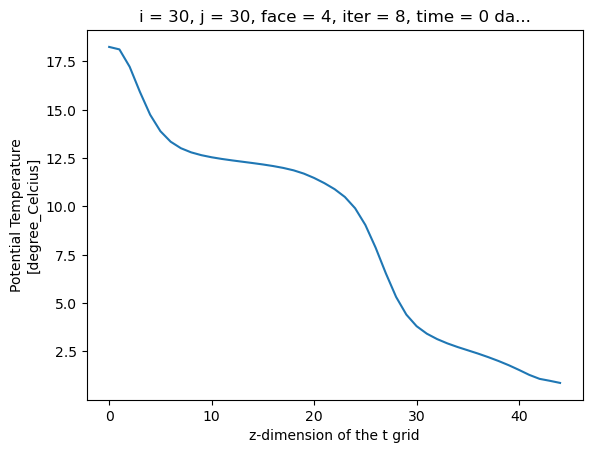

In [38]:
ds['T'].isel(time=-1,face=4,i=30,j=30,k=slice(0,45)).plot()